reference
- https://www.kaggle.com/code/kappernielsen/independent-t-test-example
- https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php   

dataset
- https://www.kaggle.com/datasets/alejandraalvarado/student-mat?resource=download

In [8]:
import os

os.listdir('./')

['t-test.ipynb', 'student-mat.csv']

In [12]:
import pandas as pd
pd.set_option('display.max_columns', None)

df = pd.read_csv('./student-mat.csv', sep=';')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

- Whether first year graduate salaries differed based on gender?
- Whether there is a difference in test anxiety based on educational level

# Question: Is there a statistically significant difference between how well boys and girls do on their final scores?

- Independent Varaibles : gender
- Dependent Variable : final score
   
Hypothesis   
- $H_0$ : there is no difference
- $H_{\alpha}$ : there is difference

In [15]:
test_df = df[['sex', 'G3']].copy()
test_df

,sex,G3
0,F,6
1,F,6
2,F,10
3,F,15
4,F,10
...,...,...
390,M,9
391,M,16
392,M,7
393,M,10


t-test 사용할 수 있는지 검증하기


In [19]:
# 1. Your **dependent variable** should be measured on a **continuous** scale

test_df['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [21]:
# 2. Your **independent variable** should consist of **two categorical**, **independent groups**.
# 3. You should have **independence of observations**, which means that there is no relationship between the observations in each group or between the groups themselves

test_df['sex'].unique()

array(['F', 'M'], dtype=object)

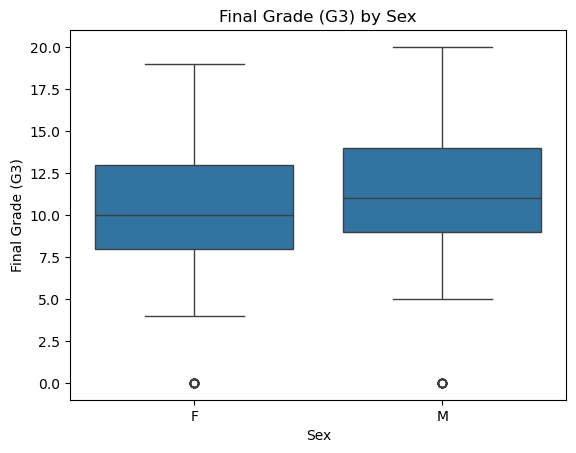

In [23]:
# 4. There should be **no significant outliers**

import seaborn as sns
import matplotlib.pyplot as plt

# 성별(sex)에 따라 G3 성적의 boxplot
sns.boxplot(x='sex', y='G3', data=test_df)
plt.title("Final Grade (G3) by Sex")
plt.xlabel("Sex")
plt.ylabel("Final Grade (G3)")
plt.show()


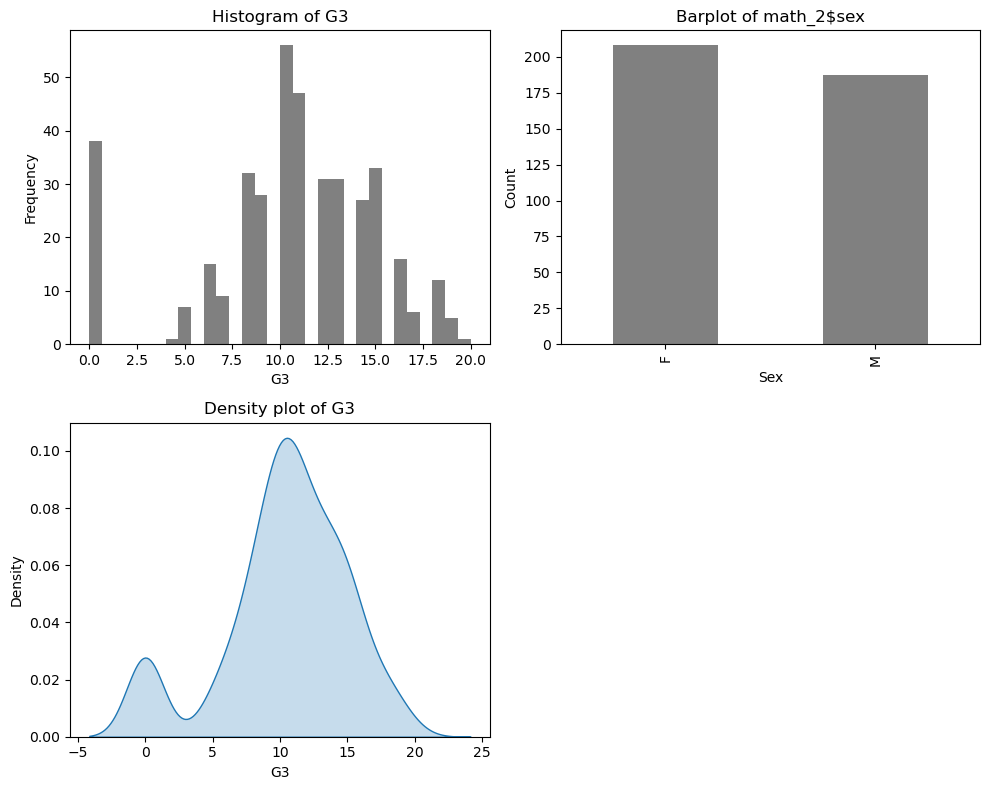

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sex별 빈도 테이블
sex_graph = test_df['sex'].value_counts()

# 서브플롯 구성 (2행 2열)
plt.figure(figsize=(10, 8))

# (1) G3 히스토그램
plt.subplot(2, 2, 1)
plt.hist(test_df['G3'], bins=30, color='grey')
plt.title("Histogram of G3")
plt.xlabel("G3")
plt.ylabel("Frequency")

# (2) sex 변수의 barplot
plt.subplot(2, 2, 2)
sex_graph.plot(kind='bar', color='grey')
plt.title("Barplot of math_2$sex")
plt.xlabel("Sex")
plt.ylabel("Count")

# (3) G3의 밀도 곡선 (density plot)
plt.subplot(2, 2, 3)
sns.kdeplot(test_df['G3'], fill=True)
plt.title("Density plot of G3")
plt.xlabel("G3")

plt.tight_layout()
plt.show()


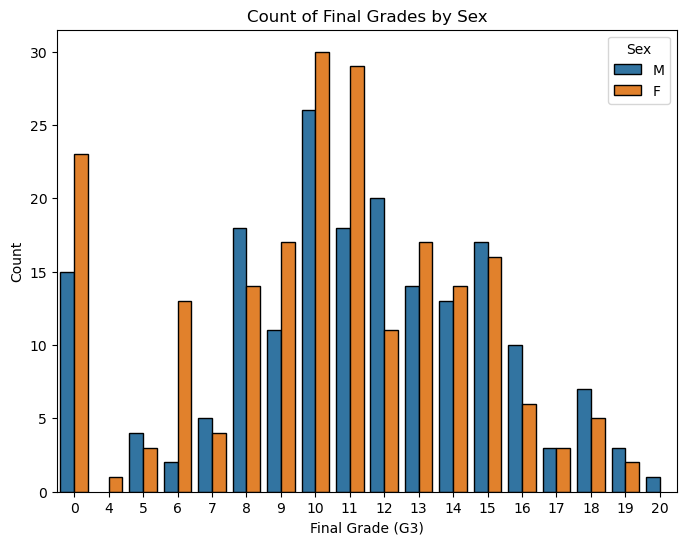

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# G3의 값이 연속형이기 때문에 막대 그래프를 위해 정수형인지 확인 (이미 정수면 OK)
plt.figure(figsize=(8, 6))
sns.countplot(data=test_df, x='G3', hue='sex', dodge=True, edgecolor='black')
plt.title("Count of Final Grades by Sex")
plt.xlabel("Final Grade (G3)")
plt.ylabel("Count")
plt.legend(title='Sex')
plt.show()

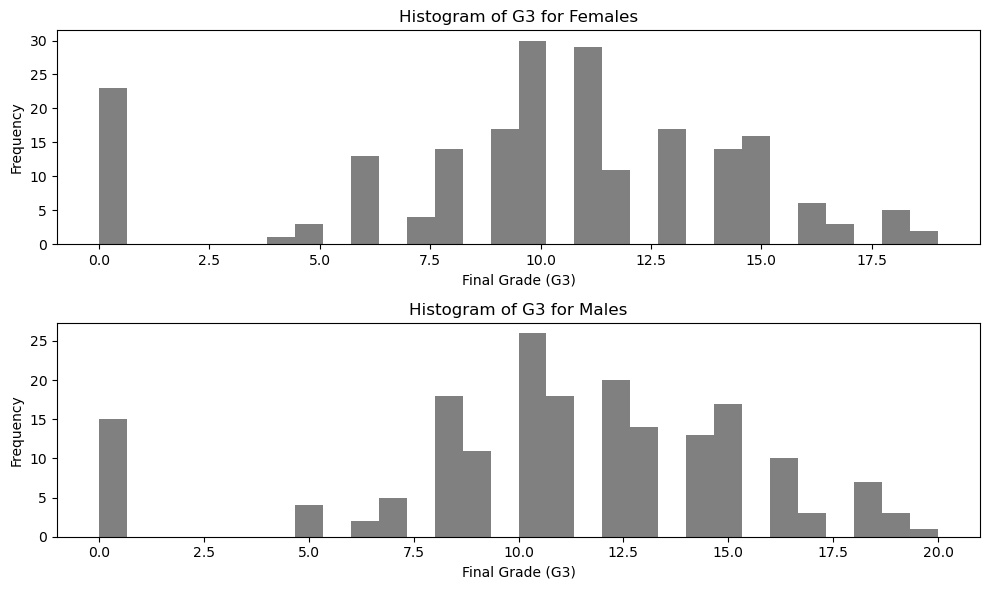

In [29]:
# 두 개의 서브플롯: 여학생(F), 남학생(M)
plt.figure(figsize=(10, 6))

# Female
plt.subplot(2, 1, 1)
plt.hist(test_df[test_df['sex'] == 'F']['G3'], bins=30, color='grey')
plt.title("Histogram of G3 for Females")
plt.xlabel("Final Grade (G3)")
plt.ylabel("Frequency")

# Male
plt.subplot(2, 1, 2)
plt.hist(test_df[test_df['sex'] == 'M']['G3'], bins=30, color='grey')
plt.title("Histogram of G3 for Males")
plt.xlabel("Final Grade (G3)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [31]:
# 여성 평균 (0점 포함)
mean_female_all = test_df[test_df['sex'] == 'F']['G3'].mean()
# 남성 평균 (0점 포함)
mean_male_all = test_df[test_df['sex'] == 'M']['G3'].mean()

print("여학생 평균 (0점 포함):", mean_female_all)
print("남학생 평균 (0점 포함):", mean_male_all)

# 인덱스 맞추기 (혹시 다를 경우 대비)
math_2 = test_df.set_index(test_df.index)

# 여성 평균 (0점 제외)
mean_female_no_zero = math_2[(math_2['sex'] == 'F') & (test_df['G3'] > 0)]['G3'].mean()
# 남성 평균 (0점 제외)
mean_male_no_zero = math_2[(math_2['sex'] == 'M') & (test_df['G3'] > 0)]['G3'].mean()

print("여학생 평균 (0점 제외):", mean_female_no_zero)
print("남학생 평균 (0점 제외):", mean_male_no_zero)


여학생 평균 (0점 포함): 9.966346153846153
남학생 평균 (0점 포함): 10.914438502673796
여학생 평균 (0점 제외): 11.205405405405406
남학생 평균 (0점 제외): 11.866279069767442


0을 포함하는게 맞을까??   
성별에 따른 성적 차이를 판단하는데 시험을 안본 학생들도 포함해야 할까?   

판단의 문제인 것 같은데, 아에 시험을 응시하지 않은 학생들을 낙제했다고 생각하면, 성별에 따라 낙제하는 정도가 포함되어야 할 것 같다. (성별이 학업 성취도에 영향을 미쳐, 낙제하는 사람이 더 많나?)   
반면에 시험을 아에 안본 학생들은 성별과 관련이 없기 때문에 제외해야한다고도 볼 수 있을 것 같다.

In [37]:
from scipy.stats import zscore

z = zscore(test_df['G3'])
significant_outliers = test_df[(z < -3) | (z > 3)]  # 절대값 3 이상이면 흔히 'significant'로 간주
significant_outliers

,sex,G3


In [52]:
# 5. Your **dependent variable** should be **approximately normally distributed for each group of the independent variable**
# 정규성 검정

# 위의 분포에서 확인할 수 있었음 (0을 제거했을 때)

test_df_non_zero = test_df[test_df['G3'] > 0].reset_index(drop=True)
female = test_df_non_zero[test_df_non_zero['sex'] == 'F']
male = test_df_non_zero[test_df_non_zero['sex'] == 'M']

<Axes: >

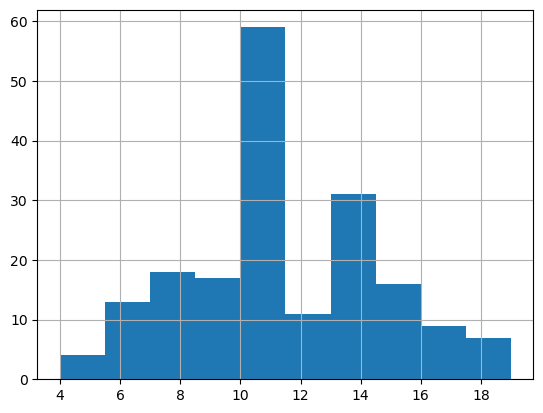

In [53]:
female['G3'].hist()

<Axes: >

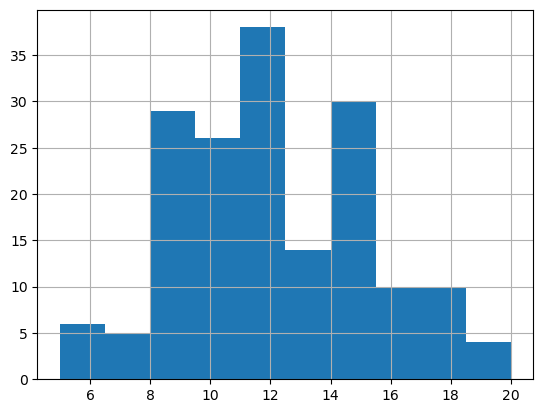

In [54]:
male['G3'].hist()

In [55]:
from scipy.stats import shapiro

stat, p = shapiro(female['G3'])
print(f"Shapiro-Wilk test: stat={stat:.4f}, p={p:.4f}")
if p > 0.05:
    print("✔ 정규분포라고 볼 수 있음 (p > 0.05)")
else:
    print("✘ 정규분포가 아님 (p ≤ 0.05)")

Shapiro-Wilk test: stat=0.9786, p=0.0060
✘ 정규분포가 아님 (p ≤ 0.05)


In [56]:
from scipy.stats import shapiro

stat, p = shapiro(male['G3'])
print(f"Shapiro-Wilk test: stat={stat:.4f}, p={p:.4f}")
if p > 0.05:
    print("✔ 정규분포라고 볼 수 있음 (p > 0.05)")
else:
    print("✘ 정규분포가 아님 (p ≤ 0.05)")

Shapiro-Wilk test: stat=0.9788, p=0.0099
✘ 정규분포가 아님 (p ≤ 0.05)


In [57]:
from scipy.stats import kstest, norm
import numpy as np

data = male['G3']
stat, p = kstest(data, 'norm', args=(data.mean(), data.std()))
print(f"K-S test: stat={stat:.4f}, p={p:.4f}")

K-S test: stat=0.1003, p=0.0586


In [58]:
from scipy.stats import kstest, norm
import numpy as np

data = female['G3']
stat, p = kstest(data, 'norm', args=(data.mean(), data.std()))
print(f"K-S test: stat={stat:.4f}, p={p:.4f}")

K-S test: stat=0.1258, p=0.0052


In [59]:
from scipy.stats import normaltest

stat, p = normaltest(male['G3'])
print(f"Normal test: stat={stat:.4f}, p={p:.4f}")

Normal test: stat=3.7175, p=0.1559


In [60]:
from scipy.stats import normaltest

stat, p = normaltest(female['G3'])
print(f"Normal test: stat={stat:.4f}, p={p:.4f}")

Normal test: stat=2.3238, p=0.3129


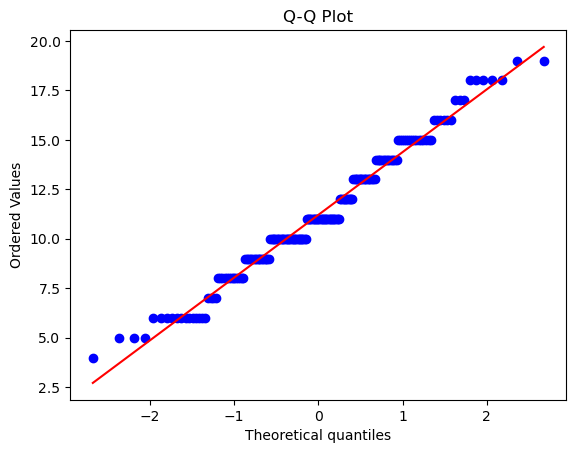

In [61]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(female['G3'], dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()


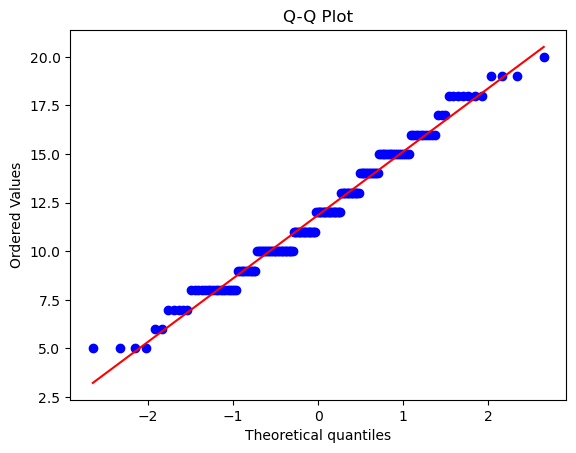

In [62]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(male['G3'], dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()


여러 nomality test 중 어떤 걸 선택해야하지?   
시각적인 자료를 기준으로 판단 가능

In [65]:
# 6. There needs to be **homogeneity of variances**.
from scipy.stats import bartlett
import pandas as pd

# Bartlett's test
stat, p = bartlett(female['G3'], male['G3'])
print(f"Bartlett’s test: stat={stat:.4f}, p-value={p:.4f}")

Bartlett’s test: stat=0.1227, p-value=0.7261


In [66]:
from scipy.stats import levene

# Levene's test
stat, p = levene(female['G3'], male['G3'])
print(f"Levene’s test: stat={stat:.4f}, p-value={p:.4f}")

Levene’s test: stat=0.6145, p-value=0.4336


6개 가정 모두 만족하는 것을 확인했으니 independent t-test 진행해보자

In [67]:
from scipy.stats import ttest_ind

# t-test (Welch's t-test: 등분산 가정하지 않음)
stat, p = ttest_ind(female['G3'], male['G3'], equal_var=False)

print(f"t-test result: t-statistic = {stat:.4f}, p-value = {p:.4f}")

# t-test (Welch's t-test: 등분산 가정하지 않음)
stat, p = ttest_ind(female['G3'], male['G3'], equal_var=True)

print(f"t-test result: t-statistic = {stat:.4f}, p-value = {p:.4f}")

t-test result: t-statistic = -1.9386, p-value = 0.0533
t-test result: t-statistic = -1.9405, p-value = 0.0531
